Gradient descent in depth
=========================

*Fraida Fund*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import seaborn as sns
sns.set()

# for 3d interactive plots
from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Data generated by a linear function
-----------------------------------

In [2]:
def generate_linear_regression_data(n=100, d=1, coef=[5], intercept=1, sigma=0):
  x = np.random.randn(n,d)
  y = (np.dot(x, coef) + intercept).squeeze() + sigma * np.random.randn(n)
  return x, y

Gradient descent for simple linear regression
---------------------------------------------

### Generate data

In [3]:
w_true = np.array([2, 3])
# y = 2 + 3x

In [4]:
intercept = w_true[0]
coef = w_true[1:]
print(intercept, coef)

2 [3]


In [5]:
n_samples = 100

In [6]:
x, y = generate_linear_regression_data(n=n_samples, d=1, coef=coef, intercept=intercept)

In [7]:
x.shape

(100, 1)

In [8]:
y.shape

(100,)

In [9]:
X = np.hstack((np.ones((n_samples, 1)), x))
X.shape

(100, 2)

In [10]:
print(X[:5])

[[ 1.         -0.96674887]
 [ 1.         -0.6483892 ]
 [ 1.          0.43911718]
 [ 1.         -0.19312981]
 [ 1.         -0.90133134]]


### Define a descent step

In each gradient descent step, we will compute

$$ 
w^{t+1} = w^t - \alpha^t \nabla L(w^t)  
$$

With a mean squared error loss function

$$ 
\begin{aligned}
L(w) &= \frac{1}{2} \sum_{i=1}^n (y_i - \langle w,x_i \rangle)^2 \\
     &= \frac{1}{2} \|y - Xw\|^2 
\end{aligned}
$$

we will compute the weights at each step as

$$
\begin{aligned} 
w^{t+1} &= w^t + \alpha^t \sum_{i=1}^n (y_i - \langle w^t,x_i \rangle) x_i \\
        &= w^t + \alpha^t X^T (y - X w^t)                  
\end{aligned}
$$

In [11]:
def gd_step(w, X, y, lr):
  # use current parameters to get y_hat
  y_hat = np.dot(X,w)
  # compute gradient for this y_hat
  grad = np.matmul(X.T, y_hat-y)
  # update weights
  w_new = w - lr*grad

  # we don't have to actually compute MSE
  # but I want to, for visualization 
  mse = 1.0/len(y)*np.sum((y_hat - y)**2)

  return (w_new, mse, grad)

### Perform gradient descent

In [12]:
itr = 50
lr = 0.001
w_init = np.random.randn(len(w_true))
print(w_init)

[ 0.10552822 -0.58238334]


In [13]:
w_steps = np.zeros((itr, len(w_init)))
mse_steps = np.zeros(itr)
grad_steps = np.zeros((itr, len(w_init)))

w_star = w_init
for i in range(itr):
  w_star, mse, gradient = gd_step(w_star, X, y, lr)
  w_steps[i] = w_star
  mse_steps[i] = mse
  grad_steps[i] = gradient

In [14]:
print(w_star)

[1.99034889 2.98121919]


### Visualize

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

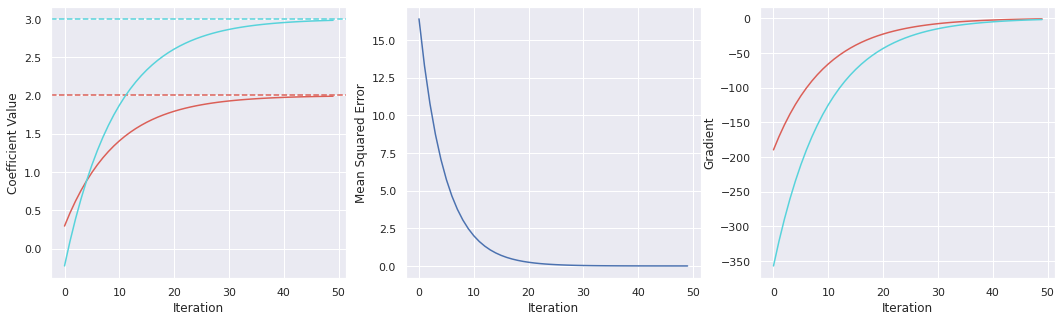

In [15]:
colors = sns.color_palette("hls", len(w_true))

plt.figure(figsize=(18,5))

plt.subplot(1,3,1);

for n in range(len(w_true)):
  plt.axhline(y=w_true[n], linestyle='--', color=colors[n]);
  sns.lineplot(np.arange(itr), w_steps[:,n], color=colors[n]);

plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");

plt.subplot(1,3, 2);
sns.lineplot(np.arange(itr), mse_steps);
#plt.yscale("log")
plt.xlabel("Iteration");
plt.ylabel("Mean Squared Error");


plt.subplot(1, 3, 3);
for n in range(len(coef)+1):
  sns.lineplot(np.arange(itr), grad_steps[:,n], color=colors[n]);
plt.xlabel("Iteration");
plt.ylabel("Gradient");

### Other things to try

-   What happens if we increase the learning rate?
-   What happens if we decrease the learning rate?

Descent path
------------

### Generate data

We will revisit our multiple linear regression.

In [16]:
w_true = [2, 6, 5]
intercept = w_true[0]
coef = w_true[1:]
print(intercept, coef)

2 [6, 5]


In [17]:
n_samples = 100

In [18]:
x, y = generate_linear_regression_data(n=n_samples, d=2, coef=coef, intercept=intercept)

### MSE contour

In [19]:
coefs = np.arange(2, 8, 0.05)
mses_coefs = np.zeros((len(coefs), len(coefs)))

for idx_1, c_1 in enumerate(coefs):
  for idx_2, c_2 in enumerate(coefs):
    y_hat_c = (intercept + np.dot(x,[c_1, c_2])).squeeze()
    mses_coefs[idx_1,idx_2] =  1.0/(len(y_hat_c)) * np.sum((y - y_hat_c)**2)

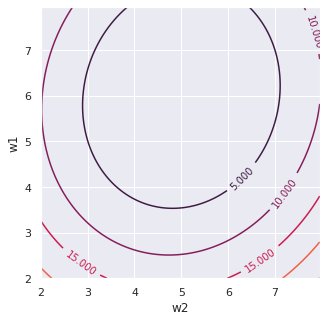

In [20]:
plt.figure(figsize=(5,5));
X1, X2 = np.meshgrid(coefs, coefs)
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w2');
plt.ylabel('w1');

### Perform gradient descent

In [21]:
X = np.column_stack((np.ones((n_samples, 1)), x))
X.shape

(100, 3)

In [69]:
itr = 50
lr = 0.02
w_init = [intercept, 2, 8]

In [70]:
w_steps = np.zeros((itr, len(w_init)))
mse_steps = np.zeros(itr)
grad_steps = np.zeros((itr, len(w_init)))

w_star = w_init
for i in range(itr):
  w_star, mse, gradient = gd_step(w_star, X, y, lr)
  w_steps[i] = w_star
  mse_steps[i] = mse
  grad_steps[i] = gradient

### Visualize

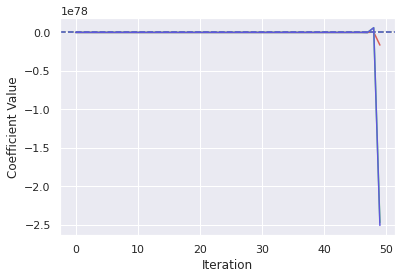

In [71]:
colors = sns.color_palette("hls", len(w_true))

for n in range(len(w_true)):
  plt.axhline(y=w_true[n], linestyle='--', color=colors[n]);
  sns.lineplot(x=np.arange(itr), y=w_steps[:,n], color=colors[n]);

plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");

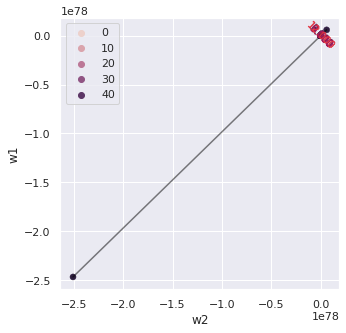

In [72]:
plt.figure(figsize=(5,5));
X1, X2 = np.meshgrid(coefs, coefs);
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w2');
plt.ylabel('w1');
sns.lineplot(x=w_steps[:,2], y=w_steps[:,1], color='black', sort=False, alpha=0.5);
sns.scatterplot(x=w_steps[:,2], y=w_steps[:,1], hue=np.arange(itr), edgecolor=None);

In [73]:
w_star

array([-1.64724103e+77, -2.47052978e+78, -2.50893136e+78])

### Other things to try

-   What happens if we generate noisy data?

Stochastic gradient descent
---------------------------

For stochastic gradient descent, we will compute the gradient and update
the weights using one sample (or a mini-batch of samples) in each step.

**A note on sampling**: In practice, the samples are often sampled
without replacement, but the statistical guarantee of convergence is for
sampling with replacement. In this example, we sample with replacement.
You can read more about different varieties of gradient descent and
stochastic gradient descent in [How is stochastic gradient descent
implemented in the context of machine learning and deep
learning](https://sebastianraschka.com/faq/docs/sgd-methods.html).

### Define a descent step

In [27]:
def sgd_step(w, X, y, lr, n):

  idx_sample = np.random.choice(X.shape[0], n, replace=True)

  X_sample = X[idx_sample, :]
  y_sample = y[idx_sample]

  # use current parameters to get y_hat
  y_hat = np.dot(X_sample,w)
  # compute gradient for this y_hat
  grad = np.matmul(X_sample.T, y_hat-y_sample)
  # update weights
  w_new = w - lr*grad

  # we don't have to actually compute MSE
  # but I want to, for visualization 
  mse = 1.0/len(y)*np.sum((y-np.dot(X, w))**2)

  return (w_new, mse, grad)

### Perform gradient descent

In [28]:
itr = 50
lr = 0.05
n = 1
w_init = [intercept, 2, 8]

In [29]:
w_steps = np.zeros((itr, len(w_init)))
mse_steps = np.zeros(itr)

w_star = w_init
for i in range(itr):
  w_star, mse, grad = sgd_step(w_star, X, y, lr, n)
  w_steps[i] = w_star
  mse_steps[i] = mse

In [30]:
w_star

array([1.51869783, 5.49733001, 5.26543646])

### Visualize

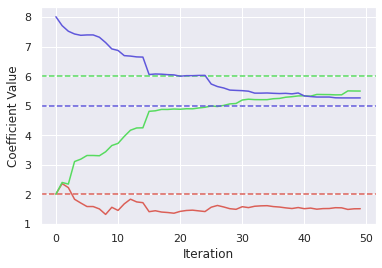

In [31]:
colors = sns.color_palette("hls", len(coef) + 1)

plt.axhline(y=intercept, linestyle='--', color=colors[0]);
sns.lineplot(x=np.arange(itr), y=w_steps[:,0], color=colors[0]);

for n in range(len(coef)):
  plt.axhline(y=coef[n], linestyle='--', color=colors[n+1]);
  sns.lineplot(x=np.arange(itr), y=w_steps[:,n+1], color=colors[n+1]);

plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");

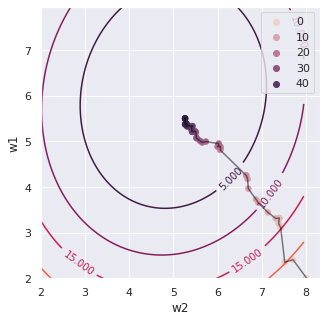

In [32]:
plt.figure(figsize=(5,5));
X1, X2 = np.meshgrid(coefs, coefs);
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w2');
plt.ylabel('w1');
sns.lineplot(x=w_steps[:,2], y=w_steps[:,1], color='black', sort=False, alpha=0.5);
sns.scatterplot(x=w_steps[:,2], y=w_steps[:,1], hue=np.arange(itr), edgecolor=None);

### Other things to try

-   Increase learning rate?
-   Decrease learning rate?
-   Use decaying learning rate $\alpha^t = \frac{C}{t}$?
-   Increase number of samples used in each iteration?

Gradient descent with noise
---------------------------

### Generate data

This time, we will use the `sigma` argument in our
`generate_linear_regression_data` function to generate data that does
not perfectly fit a linear model.

In [33]:
w_true = [2, 6, 5]
intercept = w_true[0]
coef = w_true[1:]
print(intercept, coef)

2 [6, 5]


In [34]:
n_samples = 1000

In [35]:
x, y = generate_linear_regression_data(n=n_samples, d=2, coef=coef, intercept=intercept, sigma=1)

### MSE contour

In [36]:
coefs = np.arange(2, 8, 0.05)
mses_coefs = np.zeros((len(coefs), len(coefs)))

for idx_1, c_1 in enumerate(coefs):
  for idx_2, c_2 in enumerate(coefs):
    y_hat_c = (intercept + np.dot(x,[c_1, c_2])).squeeze()
    mses_coefs[idx_1,idx_2] =  1.0/(len(y_hat_c)) * np.sum((y - y_hat_c)**2)

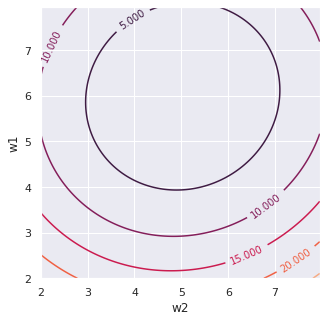

In [37]:
plt.figure(figsize=(5,5));
X1, X2 = np.meshgrid(coefs, coefs)
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w2');
plt.ylabel('w1');

### Perform gradient descent

This time, the gradient descent may not necessarily arrive at the “true”
coefficient values. That’s not because it does not find the coefficients
with minimum MSE; it’s because the coefficients with minimum MSE on the
noisy training data are not necessarily the “true” coefficients.

In [38]:
X = np.column_stack((np.ones((n_samples, 1)), x))
X.shape

(1000, 3)

In [39]:
itr = 50
lr = 0.0002
w_init = [intercept, 2, 8]

In [40]:
w_steps = np.zeros((itr, len(w_init)))
mse_steps = np.zeros(itr)

w_star = w_init
for i in range(itr):
  w_star, mse, gradient = gd_step(w_star, X, y, lr)
  w_steps[i] = w_star
  mse_steps[i] = mse

### Visualize gradient descent

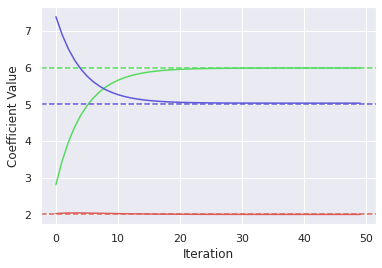

In [41]:
colors = sns.color_palette("hls", len(w_true))

for n in range(len(w_true)):
  plt.axhline(y=w_true[n], linestyle='--', color=colors[n]);
  sns.lineplot(x=np.arange(itr), y=w_steps[:,n], color=colors[n]);

plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");

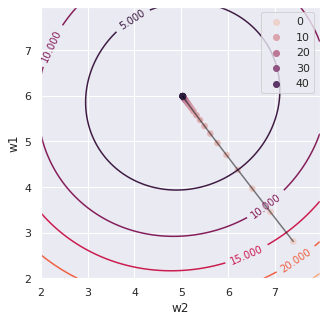

In [42]:
plt.figure(figsize=(5,5));
X1, X2 = np.meshgrid(coefs, coefs);
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w2');
plt.ylabel('w1');
sns.lineplot(x=w_steps[:,2], y=w_steps[:,1], color='black', sort=False, alpha=0.5);
sns.scatterplot(x=w_steps[:,2], y=w_steps[:,1], hue=np.arange(itr), edgecolor=None);

In [43]:
w_star

array([1.99488247, 5.98692987, 5.02909518])

In [44]:
def plot_3D(elev=20, azim=-20, X1=X1, X2=X2, mses_coefs=mses_coefs, 
            w_steps=w_steps, mse_steps=mse_steps):

    plt.figure(figsize=(10,10))
    ax = plt.subplot(projection='3d')


    # Plot the surface.
    ax.plot_surface(X1, X2, mses_coefs, alpha=0.5, cmap=cm.coolwarm,
                          linewidth=0, antialiased=False)
    ax.scatter3D(w_steps[:, 2], w_steps[:, 1], mse_steps, s=5, color='black')
    ax.plot(w_steps[:, 2], w_steps[:, 1], mse_steps, color='gray')


    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('w2')
    ax.set_ylabel('w1')
    ax.set_zlabel('MSE')

interact(plot_3D, elev=np.arange(-90,90,10), azim=np.arange(-90,90,10),
         X1=fixed(X1), X2=fixed(X2), mses_coefs=fixed(mses_coefs),
         w_steps=fixed(w_steps), mse_steps=fixed(mse_steps));

interactive(children=(Dropdown(description='elev', index=11, options=(-90, -80, -70, -60, -50, -40, -30, -20, …

### Perform stochastic gradient descent

With data that does not perfectly fit the linear model, the stochastic
gradient descent converges to a “noise ball” around the optimal
solution.

In [45]:
itr = 200
lr = 0.05
w_init = [intercept, 2, 8]

In [46]:
w_steps = np.zeros((itr, len(w_init)))
mse_steps = np.zeros(itr)

w_star = w_init
for i in range(itr):
  w_star, mse, grad = sgd_step(w_star, X, y, lr, n) 
  w_steps[i] = w_star
  mse_steps[i] = mse

### Visualize stochastic gradient descent

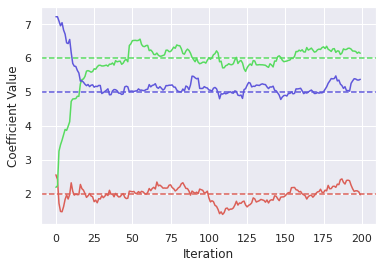

In [47]:
colors = sns.color_palette("hls", len(w_true))

for n in range(len(w_true)):
  plt.axhline(y=w_true[n], linestyle='--', color=colors[n]);
  sns.lineplot(x=np.arange(itr), y=w_steps[:,n], color=colors[n]);

plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");

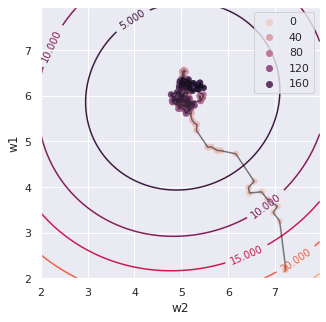

In [48]:
plt.figure(figsize=(5,5));
X1, X2 = np.meshgrid(coefs, coefs);
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w2');
plt.ylabel('w1');
sns.lineplot(x=w_steps[:,2], y=w_steps[:,1], color='black', sort=False, alpha=0.5);
sns.scatterplot(x=w_steps[:,2], y=w_steps[:,1], hue=np.arange(itr), edgecolor=None);

In [49]:
w_star

array([1.96479124, 6.14602557, 5.37523196])

In [50]:
def plot_3D(elev=20, azim=-20, X1=X1, X2=X2, mses_coefs=mses_coefs, 
            w_steps=w_steps, mse_steps=mse_steps):

    plt.figure(figsize=(10,10))
    ax = plt.subplot(projection='3d')


    # Plot the surface.
    ax.plot_surface(X1, X2, mses_coefs, alpha=0.5, cmap=cm.coolwarm,
                          linewidth=0, antialiased=False)
    ax.scatter3D(w_steps[:, 2], w_steps[:, 1], mse_steps, s=5, color='black')
    ax.plot(w_steps[:, 2], w_steps[:, 1], mse_steps, color='gray')


    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('w2')
    ax.set_ylabel('w1')
    ax.set_zlabel('MSE')

interact(plot_3D, elev=np.arange(-90,90,10), azim=np.arange(-90,90,10),
         X1=fixed(X1), X2=fixed(X2), mses_coefs=fixed(mses_coefs),
         w_steps=fixed(w_steps), mse_steps=fixed(mse_steps));


interactive(children=(Dropdown(description='elev', index=11, options=(-90, -80, -70, -60, -50, -40, -30, -20, …

A less friendly loss surface
----------------------------

In [51]:
w_true = [2, 5, 5]
intercept = w_true[0]
coef = w_true[1:]
print(intercept, coef)

2 [5, 5]


In [52]:
n_samples = 1000
d = 1
sigma = 1

x1 = np.random.randn(n_samples,d)
x2 = x1 + (sigma/5)*np.random.randn(n_samples,1)
x = np.column_stack([x1, x2])
y = (np.dot(x, coef) + intercept).squeeze() + sigma * np.random.randn(n_samples)


X = np.column_stack((np.ones((n_samples, 1)), x))

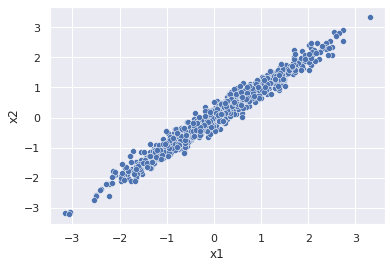

In [53]:
_ = sns.scatterplot(x=x1.squeeze(), y=x2.squeeze())
_ = plt.xlabel('x1')
_ = plt.ylabel('x2')

### MSE contour

In [54]:
coefs = np.arange(3, 7, 0.02)
mses_coefs = np.zeros((len(coefs), len(coefs)))

for idx_1, c_1 in enumerate(coefs):
  for idx_2, c_2 in enumerate(coefs):
    y_hat_c = (intercept + np.dot(x,[c_1, c_2])).squeeze()
    mses_coefs[idx_1,idx_2] =  1.0/(len(y_hat_c)) * np.sum((y - y_hat_c)**2)

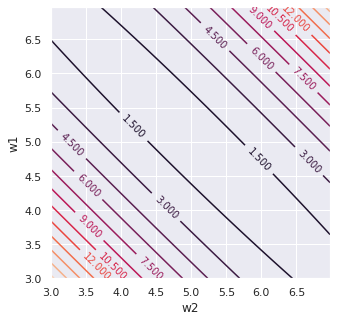

In [55]:
plt.figure(figsize=(5,5));
X1, X2 = np.meshgrid(coefs, coefs)
p = plt.contour(X1, X2, mses_coefs, levels=15);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w2');
plt.ylabel('w1');

### Perform gradient descent

In [56]:
itr = 50
lr = 0.002
n = 1
w_init = [intercept, 3, 7]

In [57]:
w_steps = np.zeros((itr, len(w_init)))
mse_steps = np.zeros(itr)
grad_steps = np.zeros((itr, len(w_init)))

w_star = w_init
for i in range(itr):
  w_star, mse, gradient = gd_step(w_star, X, y, lr)
  w_steps[i] = w_star
  mse_steps[i] = mse
  grad_steps[i] = gradient

### Visualize gradient descent

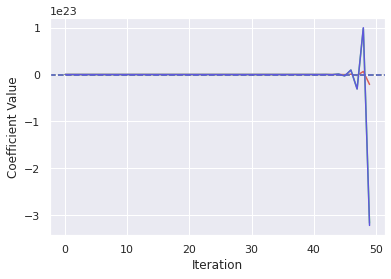

In [58]:
colors = sns.color_palette("hls", len(w_true))

for n in range(len(w_true)):
  plt.axhline(y=w_true[n], linestyle='--', color=colors[n]);
  sns.lineplot(x=np.arange(itr), y=w_steps[:,n], color=colors[n]);

plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");

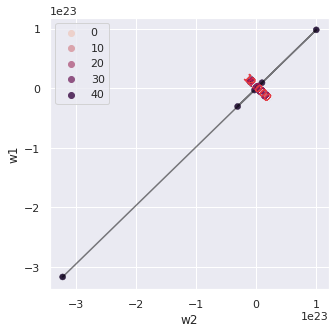

In [59]:
plt.figure(figsize=(5,5));
X1, X2 = np.meshgrid(coefs, coefs);
p = plt.contour(X1, X2, mses_coefs, levels=10);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w2');
plt.ylabel('w1');
sns.lineplot(x=w_steps[:,2], y=w_steps[:,1], color='black', alpha=0.5, sort=False);
sns.scatterplot(x=w_steps[:,2], y=w_steps[:,1], hue=np.arange(itr), edgecolor=None);

In [60]:
def plot_3D(elev=20, azim=-20, X1=X1, X2=X2, mses_coefs=mses_coefs, 
            w_steps=w_steps, mse_steps=mse_steps):

    plt.figure(figsize=(10,10))
    ax = plt.subplot(projection='3d')


    # Plot the surface.
    ax.plot_surface(X1, X2, mses_coefs, alpha=0.5, cmap=cm.coolwarm,
                          linewidth=0, antialiased=False)
    ax.scatter3D(w_steps[:, 2], w_steps[:, 1], mse_steps, s=50, color='black')
    ax.plot(w_steps[:, 2], w_steps[:, 1], mse_steps, color='gray')


    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('w2')
    ax.set_ylabel('w1')
    ax.set_zlabel('MSE')

interact(plot_3D, elev=np.arange(-90,90,10), azim=np.arange(-90,90,10),
         X1=fixed(X1), X2=fixed(X2), mses_coefs=fixed(mses_coefs),
         w_steps=fixed(w_steps), mse_steps=fixed(mse_steps));

interactive(children=(Dropdown(description='elev', index=11, options=(-90, -80, -70, -60, -50, -40, -30, -20, …